In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [6]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 141s 359ms/step - loss: 0.5487 - accuracy: 0.7186 - val_loss: 0.4976 - val_accuracy: 0.7678
Epoch 2/10
391/391 [==============================] - 130s 332ms/step - loss: 0.3644 - accuracy: 0.8496 - val_loss: 0.4115 - val_accuracy: 0.8357
Epoch 3/10
391/391 [==============================] - 130s 332ms/step - loss: 0.3064 - accuracy: 0.8780 - val_loss: 0.4568 - val_accuracy: 0.8161
Epoch 4/10
391/391 [==============================] - 130s 333ms/step - loss: 0.2380 - accuracy: 0.9114 - val_loss: 0.4860 - val_accuracy: 0.8212
Epoch 5/10
391/391 [==============================] - 130s 334ms/step - loss: 0.2550 - accuracy: 0.8986 - val_loss: 0.5007 - val_accuracy: 0.8165
Epoch 6/10
391/391 [==============================] - 131s 335ms/step - loss: 0.2241 - accuracy: 0.9181 - val_loss: 0.5347 - val_accuracy: 0.8254
Epoch 7/10
391/391 [==============================] - 130s 334ms/step - loss: 0.1817 - accuracy: 0.9360 - val_loss: 0.5771 -

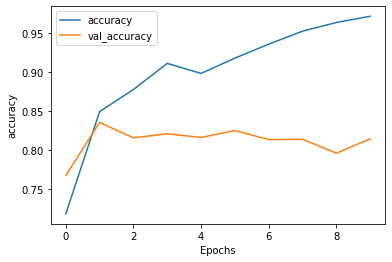

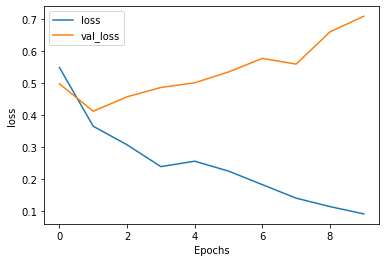

In [7]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')